## 4.10.1 Part 1 Final Report

### This script contains the following points:

#### 1. Import Customer Data & Check Dimensions
#### 2. Remove PII data: first_name, last_name columns
#### 3. Create Regional Segmentation & compare with spending habits
#### 4. Create Exclusion flag for customers w/ <5 orders - Export this sample
#### 5. Create a profiling variable
#### 6. Aggregate max, mean, and min on a customer-profile level for usage frequency and expenditure & Create visualizations
#### 7. Compare profiles with regions and departments to identify possible links & Create charts
#### 8. Export final data set

### 01. Import data & Check dimensions

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Tell pandas not to truncate columns

pd.set_option('display.max_columns', None)

In [3]:
# Create string path for main project folder

path = r'/Users/AngieUS/Desktop/Instacart Project'

# Import orders_products_all data 

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

# Check df_all

df_all.head()  

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income,_merge
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
# Display dimensions of df_all

df_all.shape

(28662590, 32)

### 02. Remove PII data: first_name, last_name columns

In [5]:
# Remove first_name, last_name columns per PII rules
df_all.drop(['first_name', 'last_name'], axis=1, inplace = True)

In [6]:
# Check df_all

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28662590 entries, 0 to 28662589
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              object  
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                object  
 11  department_id           object  
 12  prices                  float64 
 13  price_range             object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  avg_prices              float64 
 19  spending_flag           object  
 20  median_days             float64 
 21  order_

In [7]:
# Display dimensions of df_all

df_all.shape

(28662590, 30)

### 03. Create 'region' variable & cross-compare with 'spending_flag'

In [8]:
# Check frequency & quality of state column - prep for region conditions

df_all['state'].value_counts(dropna=False)

state
California              591951
Pennsylvania            590916
Rhode Island            582508
Georgia                 582058
Arizona                 580971
North Carolina          579356
Oklahoma                576734
Minnesota               574942
New Mexico              572728
Alaska                  571554
Maine                   571404
Wyoming                 571032
Massachusetts           570919
Arkansas                569161
Mississippi             568003
Texas                   566903
North Dakota            566394
Nevada                  566281
Missouri                566002
Virginia                565228
Washington              563804
South Carolina          563690
South Dakota            563533
Kansas                  563351
Louisiana               563349
Alabama                 563191
New York                562532
Montana                 562050
Kentucky                561794
Colorado                561702
Michigan                561609
Delaware                560507
Or

In [9]:
# Create conditional state lists for new region variable

northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
# Create new region variable with conditions

df_all.loc[df_all['state'].isin(northeast),'region']='northeast'

In [11]:
df_all.loc[df_all['state'].isin(midwest),'region']='midwest'

In [12]:
df_all.loc[df_all['state'].isin(south),'region']='south'

In [13]:
df_all.loc[df_all['state'].isin(west),'region']='west'

In [14]:
# Check frequency of new 'region' variable

df_all['region'].value_counts(dropna = False)

region
south        9543283
west         7332003
midwest      6712844
northeast    5074460
Name: count, dtype: int64

In [15]:
# Display dimensions of df_all

df_all.shape

(28662590, 31)

In [16]:
# Display cross-comparison between 'region' and 'spending_flag'

crosstab = pd.crosstab(df_all['region'], df_all['spending_flag'], dropna = False)
crosstab

spending_flag,High Spender,Low Spender
region,,
midwest,141381,6571463
northeast,95825,4978635
south,182784,9360499
west,137741,7194262


### 04. Create Exclusion flag for customers w/ <5 orders and remove them from the data - Export this sample

In [17]:
# Create function to determine customer activity level based on 'max_order'
# Define flag for comparison to max_order

def customer_activity(row):
    if row['max_order'] < 5:
        return 'low'
    else:
        return 'high'

# Apply function to max_order and create cust_activity column

df_all['activity_flag'] = df_all.apply(customer_activity, axis=1)

# Filter out low customer activity from dataframe

df_cust_high = df_all[df_all['activity_flag'] == 'high']
df_cust_low = df_all[df_all['activity_flag'] == 'low']

In [18]:
# Check frequency of new 'activity_flag' variable

df_all['activity_flag'].value_counts(dropna = False)

activity_flag
high    27695232
low       967358
Name: count, dtype: int64

In [19]:
# Check df_cust_high

df_cust_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag,gender,state,age,date_joined,dependents,fam_status,income,_merge,region,activity_flag
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high


In [20]:
# Display dimensions of df_cust_high

df_cust_high.shape

(27695232, 32)

In [21]:
# Display dimensions of df_cust_low

df_cust_low.shape

(967358, 32)

In [22]:
# Export new data file with exclusion removed (only customers with 5+ orders)

df_cust_high.to_pickle(os.path.join(path, '02 Data','Prepared Data','ord_prod_cust_all.pkl'))

In [23]:
# Export data file with exclusion list (only excluded customers with <5 orders)

df_cust_low.to_pickle(os.path.join(path, '02 Data','Prepared Data','cust_excluded.pkl'))

### 05. Customer Profiling

In [24]:
# set df_cust_high to working dataframe (df_all)

df_all = df_cust_high

In [25]:
# Display dimensions of df_all

df_all.shape

(27695232, 32)

### <ins>Profiles</ins>

### AGE

In [26]:
# Display frequency of 'age' column

df_all['age'].value_counts(dropna=False)

age
48    454926
79    453064
31    452435
56    451744
64    450855
       ...  
60    413472
65    408279
66    406886
41    400945
25    398931
Name: count, Length: 64, dtype: int64

In [27]:
#Create age profile conditional function

def age_group(row):

  if row['age'] < 30:
    return 'Young'
  elif (row['age'] >= 30) and (row['age'] < 65):
    return 'Adult'
  elif row['age'] >= 65:
    return 'Senior'
  else: return 'Not enough data'

df_all['age_group'] = df_all.apply(age_group, axis=1)

In [28]:
# Check frequency of new 'age_group' variable

df_all['age_group'].value_counts(dropna = False)

age_group
Adult     15175721
Senior     7321521
Young      5197990
Name: count, dtype: int64

### INCOME

In [29]:
# Display range of 'income' column

df_all['income'].describe().round(2)

count    27695232.00
mean        99722.45
std         43134.13
min         25903.00
25%         67414.00
50%         96767.00
75%        128143.00
max        593901.00
Name: income, dtype: float64

In [30]:
#Create income profile conditional function

def income_group(row):

  if row['income'] < 100000:
    return 'Low Income'
  elif (row['income'] >= 100000) and (row['income'] < 250000):
    return 'Middle Income'
  elif row['income'] >= 250000:
    return 'High Income'
  else: return 'Not enough data'

df_all['income_group'] = df_all.apply(income_group, axis=1)

In [31]:
# Check frequency of new 'income_group' variable

df_all['income_group'].value_counts(dropna = False)

income_group
Low Income       14978478
Middle Income    12555580
High Income        161174
Name: count, dtype: int64

### PET OWNERS

In [32]:
# Review product departments to form profiling variable and data dictionary prep
# Import department names list

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [33]:
# Create data dictionary

df_dept.set_index('department_id', inplace=True)
data_dict = df_dept.to_dict('index')

data_dict

{'department_id': {'department': 'department'},
 '1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [34]:
# Display the count/frequency for the pets (8) value under department_id

df_all['department_id'].value_counts()['8']

82882

In [35]:
# Create filtered df_pets subset
df_pets = df_all.loc[df_all['department_id'] == '8']

# Check df_pets
df_pets.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag,gender,state,age,date_joined,dependents,fam_status,income,_merge,region,activity_flag,age_group,income_group
496,3120740,7,15,3,16,2.0,29602,7,0,Ear Candy (Cow Ears) Dog Chews,40,8,9.8,Mid-range product,Least busy,Most orders,20,Regular customer,7.521649,Low Spender,9.0,Frequent customer,Male,Connecticut,39,4/1/2017,2,married,89095,both,northeast,high,Adult,Low Income
852,1247527,12,2,5,9,30.0,10863,2,0,Grain Free Turkey & Salmon Formula Cat Food,41,8,10.1,Mid-range product,Regularly busy,Most orders,5,New customer,8.208451,Low Spender,30.0,Non-frequent customer,Male,Hawaii,46,10/16/2017,0,single,167293,both,west,high,Adult,Middle Income
853,1247527,12,2,5,9,30.0,17766,3,0,Grain Free Turkey Formula Cat Food,41,8,11.5,Mid-range product,Regularly busy,Most orders,5,New customer,8.208451,Low Spender,30.0,Non-frequent customer,Male,Hawaii,46,10/16/2017,0,single,167293,both,west,high,Adult,Middle Income
854,1247527,12,2,5,9,30.0,7076,4,0,Grain Free Chicken Formula Cat Food,41,8,5.8,Mid-range product,Regularly busy,Most orders,5,New customer,8.208451,Low Spender,30.0,Non-frequent customer,Male,Hawaii,46,10/16/2017,0,single,167293,both,west,high,Adult,Middle Income
855,1247527,12,2,5,9,30.0,28134,5,0,Grain Free Turkey Canned Cat Food,41,8,8.5,Mid-range product,Regularly busy,Most orders,5,New customer,8.208451,Low Spender,30.0,Non-frequent customer,Male,Hawaii,46,10/16/2017,0,single,167293,both,west,high,Adult,Middle Income


In [36]:
# Display dimensions of df_pets

df_pets.shape

(82882, 34)

### No. DEPENDENTS

In [37]:
# Display frequency of 'dependents' column

df_all['dependents'].value_counts(dropna=False)

dependents
3    6944652
2    6924053
0    6919165
1    6907362
Name: count, dtype: int64

In [38]:
# Create dependents profile conditional function

def dependents_group(row):

  if row['dependents'] == 0:
    return 'None'
  elif (row['dependents'] >= 1) and (row['dependents'] < 3):
    return 'Average'
  elif row['dependents'] >= 3:
    return 'Many'
  else: return 'Not enough data'

df_all['dependents_group'] = df_all.apply(dependents_group, axis=1)

In [39]:
# Check frequency of new 'dependents_group' variable

df_all['dependents_group'].value_counts(dropna = False)

dependents_group
Average    13831415
Many        6944652
None        6919165
Name: count, dtype: int64

### 06. Aggregate max, min, and mean for usage frequency & expenditure / Create Visualization

### AGE

In [40]:
# Display aggregated mean, min, max for usage frequency median_days

age_agg_days_data = df_all.groupby('age_group').agg({'median_days':['mean', 'min', 'max']})
print(age_agg_days_data)

          median_days           
                 mean  min   max
age_group                       
Adult        9.769558  0.0  30.0
Senior       9.720894  0.0  30.0
Young        9.749863  0.0  30.0


In [41]:
# Display aggregated mean, min, max for expenditure

df_all.groupby('age_group').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
Adult      7.791704  1.0  25.0
Senior     7.798088  1.0  25.0
Young      7.785275  1.0  25.0

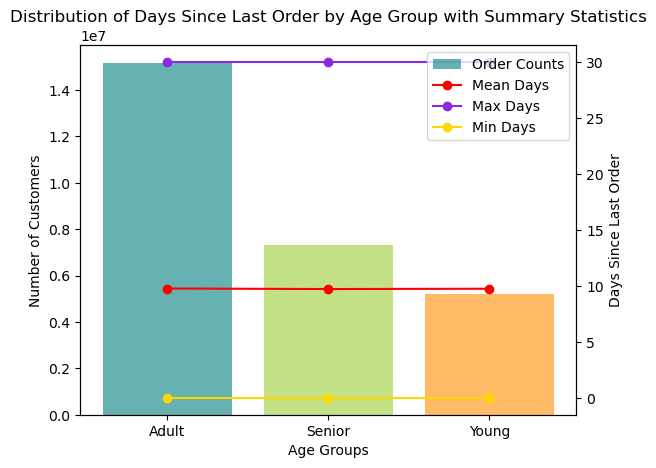

In [42]:
# Create visualization chart
# Plot distribution
age_groups = age_agg_days_data.index.tolist()
means = age_agg_days_data['median_days']['mean'].tolist()
min_values = age_agg_days_data['median_days']['min'].tolist()
max_values = age_agg_days_data['median_days']['max'].tolist()

fig, ax1 = plt.subplots()

# Bar/Line chart for customer order counts and summary stats
order_counts = df_all['age_group'].value_counts().loc[age_groups].tolist()
ax1.bar(age_groups, order_counts, color=['teal', 'yellowgreen', 'darkorange'], alpha=0.6, label='Order Counts')
ax1.set_xlabel('Age Groups')
ax1.set_ylabel('Number of Customers', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot for mean, min, and max prices
ax2 = ax1.twinx()
ax2.plot(age_groups, means, color='red', marker='o', label='Mean Days')
ax2.plot(age_groups, max_values, color='blueviolet', marker='o', label='Max Days')
ax2.plot(age_groups, min_values, color='gold', marker='o', label='Min Days')
ax2.set_ylabel('Days Since Last Order', color='black')
ax2.tick_params(axis='y', labelcolor='black')
  
# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Distribution of Days Since Last Order by Age Group with Summary Statistics')

# Export bar chart image
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_line_age_days.png'))

plt.show()


### INCOME

In [43]:
# Display aggregated mean, min, max for usage frequency median_days

df_all.groupby('income_group').agg({'median_days':['mean', 'min', 'max']})

median_days           
                     mean  min   max
income_group                        
High Income      9.035232  1.0  30.0
Low Income       9.818749  0.0  30.0
Middle Income    9.683769  0.0  30.0

In [45]:
# Display aggregated mean, min, max for expenditure

inc_agg_price_data = df_all.groupby('income_group').agg({'prices':['mean', 'min', 'max']})
print(inc_agg_price_data)

                 prices           
                   mean  min   max
income_group                      
High Income    7.776471  1.0  25.0
Low Income     7.655770  1.0  25.0
Middle Income  7.955126  1.0  25.0


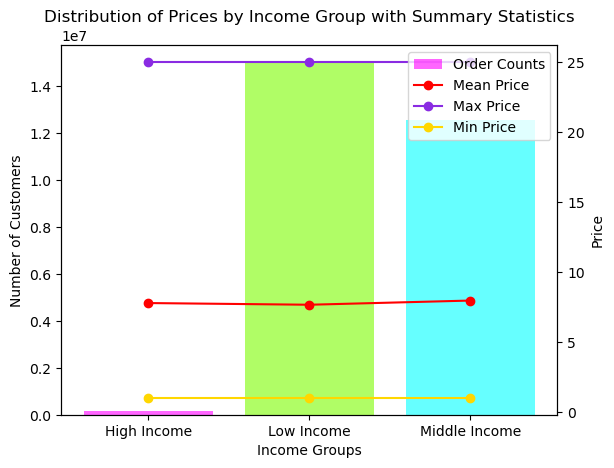

In [46]:
# Create visualization chart
# Plot distribution
income_groups = inc_agg_price_data.index.tolist()
means = inc_agg_price_data['prices']['mean'].tolist()
min_values = inc_agg_price_data['prices']['min'].tolist()
max_values = inc_agg_price_data['prices']['max'].tolist()

fig, ax1 = plt.subplots()

# Bar/Line chart for customer order counts and summary stats
order_counts = df_all['income_group'].value_counts().loc[income_groups].tolist()
ax1.bar(income_groups, order_counts, color=['magenta', 'lawngreen', 'aqua'], alpha=0.6, label='Order Counts')
ax1.set_xlabel('Income Groups')
ax1.set_ylabel('Number of Customers', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot for mean, min, and max prices
ax2 = ax1.twinx()
ax2.plot(income_groups, means, color='red', marker='o', label='Mean Price')
ax2.plot(income_groups, max_values, color='blueviolet', marker='o', label='Max Price')
ax2.plot(income_groups, min_values, color='gold', marker='o', label='Min Price')
ax2.set_ylabel('Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')
  
# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Distribution of Prices by Income Group with Summary Statistics')

# Export bar chart image
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_line_income_price.png'))

plt.show()


### PET OWNERS

In [47]:
# Display aggregated mean, min, max for usage frequency median_days

df_pets['days_since_prior_order'].agg(['mean', 'min', 'max'])

mean    11.580717
min      0.000000
max     30.000000
Name: days_since_prior_order, dtype: float64

In [48]:
# Display aggregated mean, min, max for expenditure

pets_agg_price_data = df_pets['prices'].agg(['mean', 'min', 'max'])
print(pets_agg_price_data)

mean     7.880623
min      1.000000
max     15.000000
Name: prices, dtype: float64


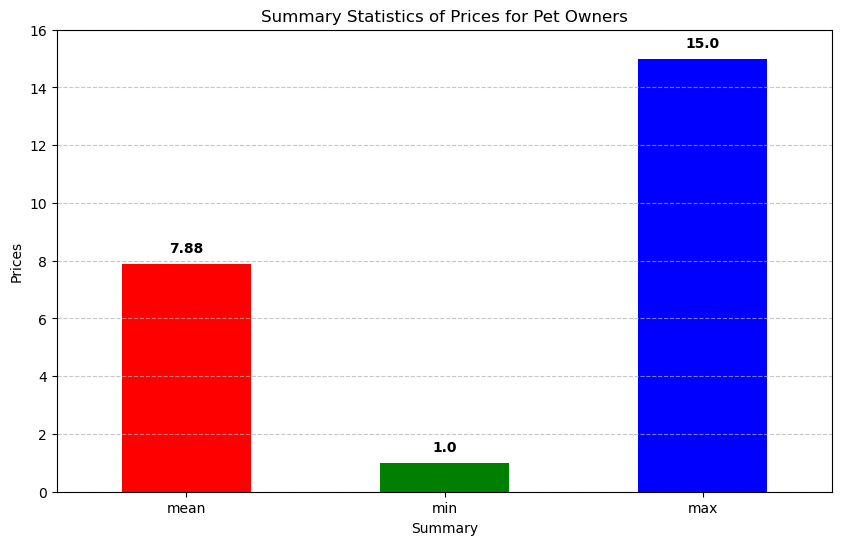

In [49]:
# Create visualization chart

summary_stats = pd.Series({'mean': 7.880623, 'min': 1.0, 'max': 15.0}, name='prices')

plt.figure(figsize=(10, 6))
summary_stats.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Summary Statistics of Prices for Pet Owners')
plt.xlabel('Summary')
plt.ylabel('Prices')
plt.ylim(0, 16)  # Set y-axis limits to give some space above the max value
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels on the bars
for index, value in enumerate(summary_stats):
    plt.text(index, value + 0.3, round(value, 2), ha='center', va='bottom', color='black', fontweight='bold')

# Export bar chart image
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_pets_price.png'))

plt.show()


### No. DEPENDENTS

In [50]:
# Display aggregated mean, min, max for usage frequency median_days

dep_agg_days_data = df_all.groupby('dependents_group').agg({'median_days':['mean', 'min', 'max']})
print(dep_agg_days_data)

                 median_days           
                        mean  min   max
dependents_group                       
Average             9.764503  0.0  30.0
Many                9.754568  0.0  30.0
None                9.728417  0.0  30.0


In [51]:
# Display aggregated mean, min, max for expenditure

df_all.groupby('dependents_group').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
dependents_group                     
Average           7.792009  1.0  25.0
Many              7.794117  1.0  25.0
None              7.790598  1.0  25.0

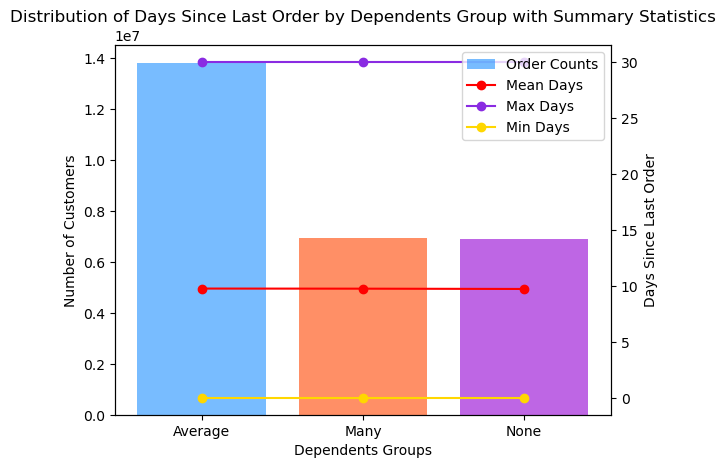

In [52]:
# Plot distribution
dependents_groups = dep_agg_days_data.index.tolist()
means = dep_agg_days_data['median_days']['mean'].tolist()
min_values = dep_agg_days_data['median_days']['min'].tolist()
max_values = dep_agg_days_data['median_days']['max'].tolist()

fig, ax1 = plt.subplots()

# Bar/Line chart for customer order counts and summary stats
order_counts = df_all['dependents_group'].value_counts().loc[dependents_groups].tolist()
ax1.bar(dependents_groups, order_counts, color=['dodgerblue', 'orangered', 'darkviolet'], alpha=0.6, label='Order Counts')
ax1.set_xlabel('Dependents Groups')
ax1.set_ylabel('Number of Customers', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line plot for mean, min, and max prices
ax2 = ax1.twinx()
ax2.plot(dependents_groups, means, color='red', marker='o', label='Mean Days')
ax2.plot(dependents_groups, max_values, color='blueviolet', marker='o', label='Max Days')
ax2.plot(dependents_groups, min_values, color='gold', marker='o', label='Min Days')
ax2.set_ylabel('Days Since Last Order', color='black')
ax2.tick_params(axis='y', labelcolor='black')
  
# Adding legends
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title('Distribution of Days Since Last Order by Dependents Group with Summary Statistics')

# Export bar chart image
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_line_dep_days.png'))

plt.show()

### 07. Compare profiles with regions and departments to identify possible links & Create charts

In [53]:
# Compare and Chart age_group/spending_flag/region

crosstab = pd.crosstab([df_all['age_group'], df_all['spending_flag']], df_all['region'], dropna=False)
crosstab

region                   midwest  northeast    south     west
age_group spending_flag                                      
Adult     High Spender     73422      52812   100354    72962
          Low Spender    3509802    2589708  4953627  3823034
Senior    High Spender     37647      21986    41578    34940
          Low Spender    1656608    1317384  2376853  1834525
Young     High Spender     24028      16483    32023    23199
          Low Spender    1185424     902792  1716415  1297626

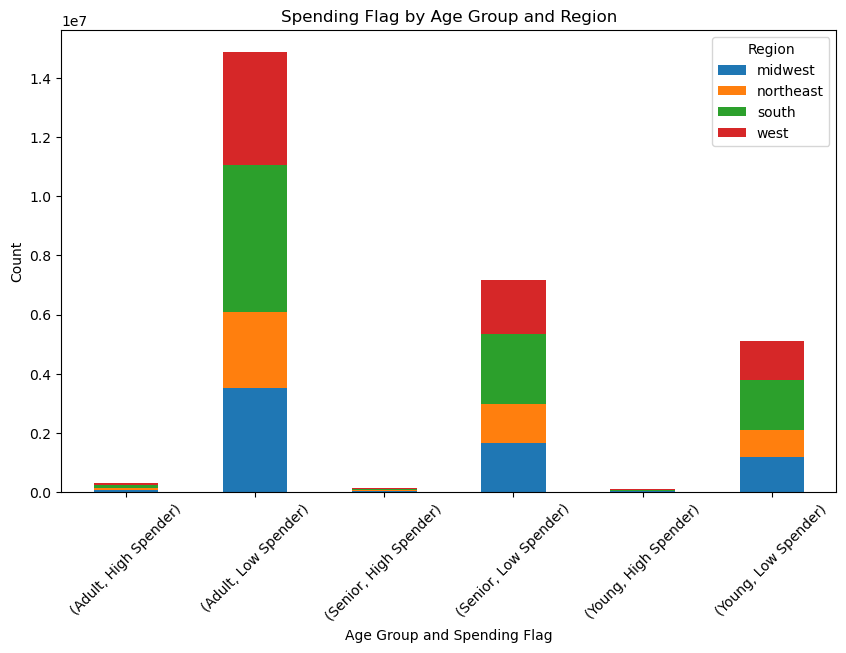

In [54]:
# Display stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Spending Flag by Age Group and Region')
plt.xlabel('Age Group and Spending Flag')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_age_region.png'))

plt.show()

In [55]:
# Compare and Chart income_group/alcohol group/region

# Create filtered department-alcohol variable

df_alcohol = df_all.loc[df_all['department_id'] == '5']
df_alcohol.shape

(128664, 35)

In [56]:
# Display cross-comparison between income_group/alcohol group/region


crosstab = pd.crosstab([df_all['income_group'], df_alcohol['department_id']], df_all['region'], dropna=False)
crosstab

,region,midwest,northeast,south,west
income_group,department_id,,,,
High Income,5,944,998,1296,940
Low Income,5,15749,11116,23496,16611
Middle Income,5,13935,10014,18512,15053


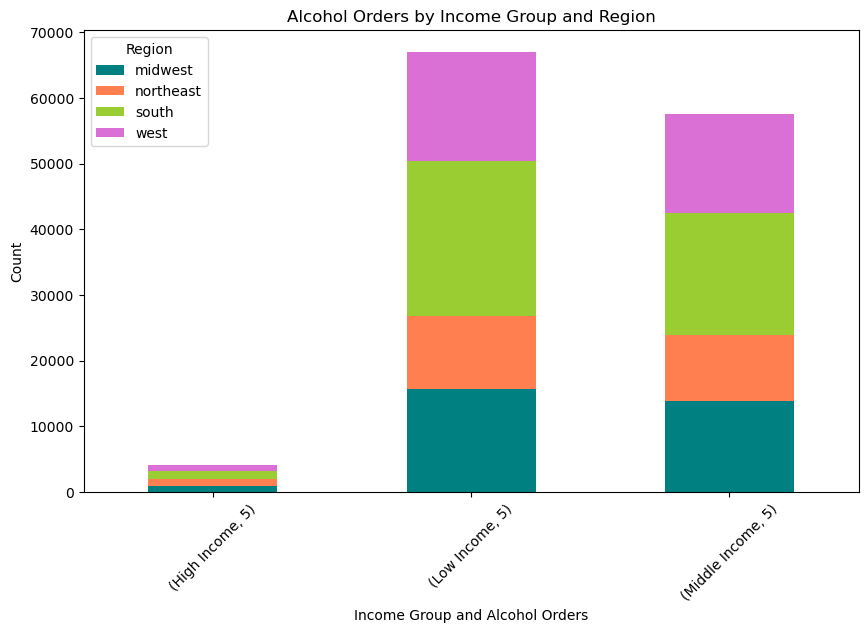

In [57]:
# Display stacked bar chart
colors = ['teal', 'coral', 'yellowgreen', 'orchid']
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Alcohol Orders by Income Group and Region')
plt.xlabel('Income Group and Alcohol Orders')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_inc_region.png'))

plt.show()

In [58]:
# Compare and Chart pets_group/region

crosstab = pd.crosstab(df_pets['order_freq_flag'], df_pets['region'], dropna=False)
crosstab

region,midwest,northeast,south,west
order_freq_flag,,,,
Frequent customer,12359,10466,17246,13112
Non-frequent customer,1872,1218,2562,2355
Regular customer,4876,4025,6774,6017


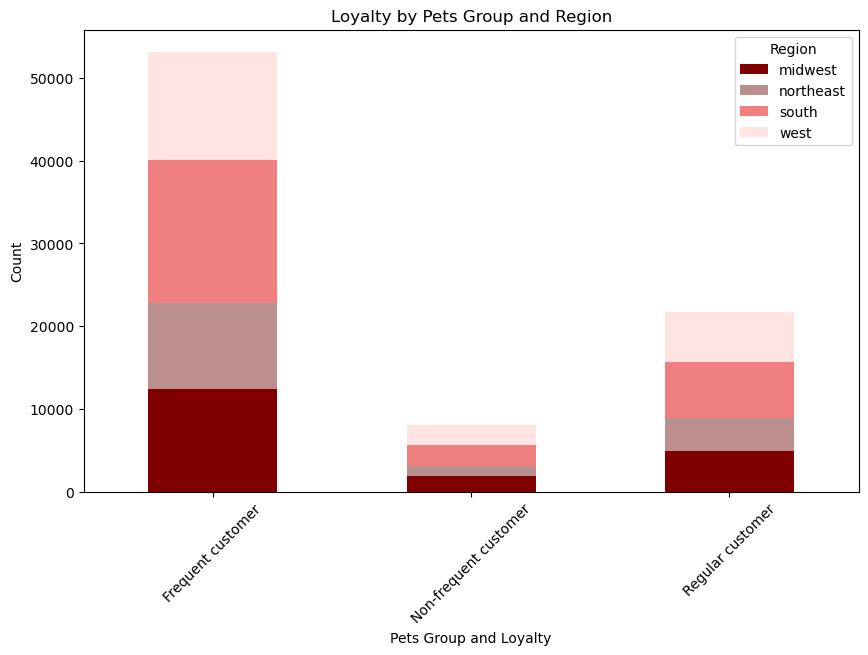

In [59]:
# Display stacked bar chart
colors = ['maroon', 'rosybrown', 'lightcoral', 'mistyrose']
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Loyalty by Pets Group and Region')
plt.xlabel('Pets Group and Loyalty')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_pets_region.png'))

plt.show()

In [60]:
# Compare and Chart dependents/region

crosstab = pd.crosstab([df_all['dependents_group'], df_all['price_range']], df_all['region'], dropna=False)
crosstab

region                               midwest  northeast    south     west
dependents_group price_range                                             
Average          High-range product    41256      30852    59209    45363
                 Low-range product   1020464     770175  1437783  1092273
                 Mid-range product   2203054    1655935  3111086  2363965
Many             High-range product    20458      16229    29125    23098
                 Low-range product    494152     386202   720046   568325
                 Mid-range product   1073413     831541  1562387  1219676
None             High-range product    20277      14929    28824    22020
                 Low-range product    510178     379481   719247   554611
                 Mid-range product   1103679     815821  1553143  1196955

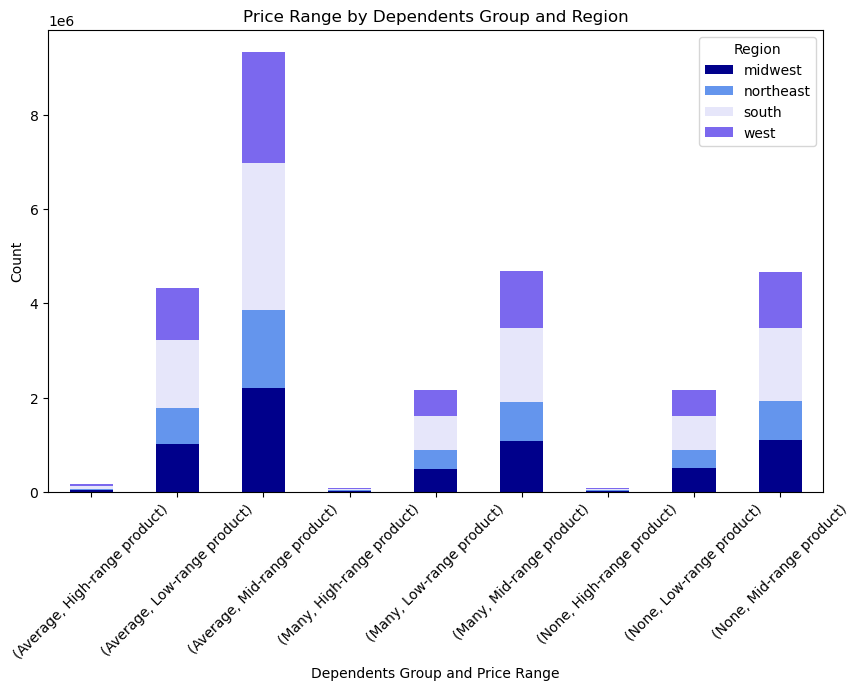

In [61]:
# Display stacked bar chart
colors = ['darkblue', 'cornflowerblue', 'lavender', 'mediumslateblue']
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Price Range by Dependents Group and Region')
plt.xlabel('Dependents Group and Price Range')
plt.ylabel('Count')
plt.legend(title='Region')
plt.xticks(rotation=45)

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_dep_region.png'))

plt.show()

In [77]:
# Reset the index if department_id is set as the index
if df_dept.index.name == 'department_id':
    df_dept.reset_index(inplace=True)

# Drop the header row if it exists as a row in the DataFrame
df_dept = df_dept[df_dept['department_id'] != 'department_id']

# Convert department_id to integer in both DataFrames
df_dept['department_id'] = df_dept['department_id'].astype(int)
df_all['department_id'] = df_all['department_id'].astype(int)

# Create the dictionary from df_dept
dept_dict = df_dept.set_index('department_id')['department'].to_dict()

# Add the dept_name column to df_all
df_all['dept_name'] = df_all['department_id'].map(dept_dict)

In [78]:
df_all.shape

(27695232, 36)

In [79]:
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_prices,spending_flag,median_days,order_freq_flag,gender,state,age,date_joined,dependents,fam_status,income,_merge,region,activity_flag,age_group,income_group,dependents_group,dept_name
0,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high,Adult,Low Income,Many,beverages
1,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,117,19,3.0,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high,Adult,Low Income,Many,snacks
2,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,4.4,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high,Adult,Low Income,Many,snacks
3,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high,Adult,Low Income,Many,produce
4,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,4.7,Low-range product,Least busy,Average orders,10,New customer,6.372222,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,south,high,Adult,Low Income,Many,snacks


In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27695232 entries, 0 to 28662589
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                object  
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              object  
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                object  
 11  department_id           int64   
 12  prices                  float64 
 13  price_range             object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  avg_prices              float64 
 19  spending_flag           object  
 20  median_days             float64 
 21  order_freq_

In [83]:
# Count orders by department

order_counts = df_all['dept_name'].value_counts()

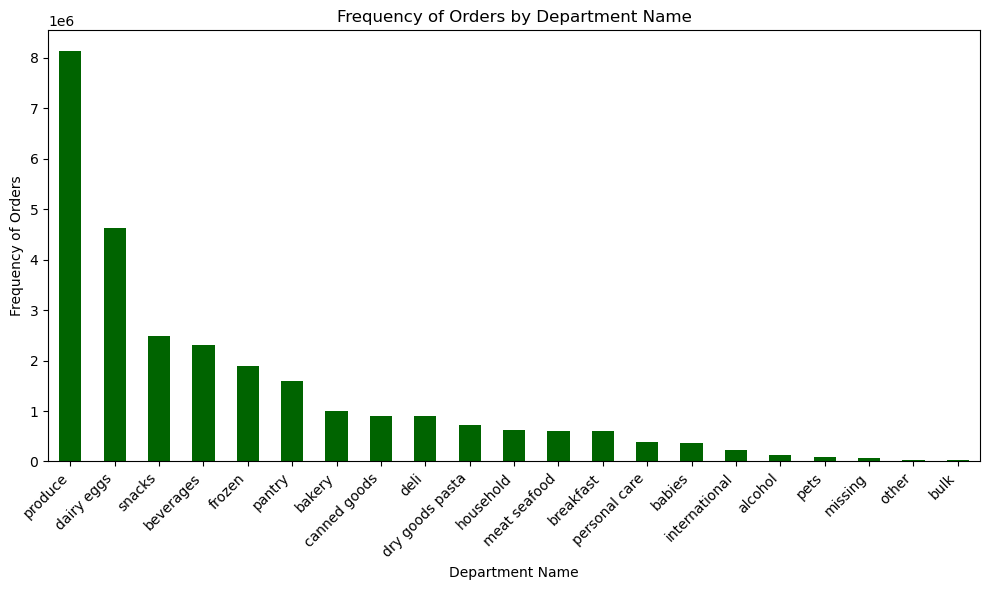

In [108]:
# Create chart

plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar', color='darkgreen')
plt.xlabel('Department Name')
plt.ylabel('Frequency of Orders')
plt.title('Frequency of Orders by Department Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_dep_orders.png'))

plt.show()

In [97]:
# Display cross-comparison between income_group/alcohol group/region

crosstab = pd.crosstab(df_all['loyalty_flag'], df_pets['orders_day_of_week'], dropna=False)
crosstab

orders_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,3634,3803,3053,3067,3066,3427,3633
New customer,2404,1794,1584,1560,1598,1762,1920
Regular customer,8396,6761,5558,6103,5877,6417,7465


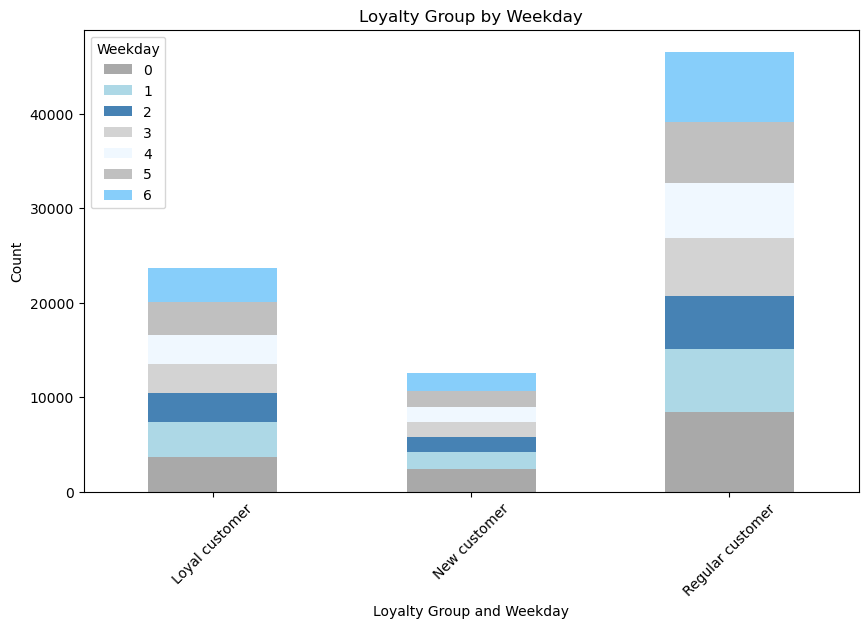

In [99]:
# Display stacked bar chart
colors = ['darkgray', 'lightblue', 'steelblue', 'lightgray', 'aliceblue', 'silver', 'lightskyblue']
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Loyalty Group by Weekday')
plt.xlabel('Loyalty Group and Weekday')
plt.ylabel('Count')
plt.legend(title='Weekday')
plt.xticks(rotation=45)

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sbar_loyal_day.png'))

plt.show()

In [101]:
# Display cross-comparison between income_group/alcohol group/region

crosstab = pd.crosstab(df_all['loyalty_flag'], df_pets['spending_flag'], dropna=False)
crosstab

spending_flag,High Spender,Low Spender
loyalty_flag,,
Loyal customer,1351,22332
New customer,329,12293
Regular customer,1934,44643


<Figure size 1000x600 with 0 Axes>

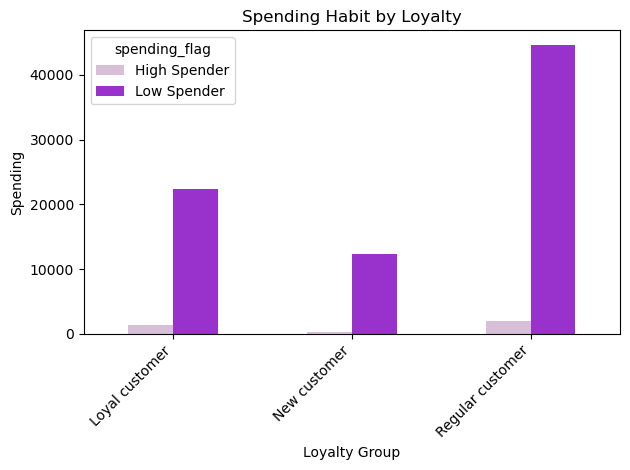

In [107]:
# Create chart

plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', color=['thistle', 'darkorchid'])
plt.xlabel('Loyalty Group')
plt.ylabel('Spending')
plt.title('Spending Habit by Loyalty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for x-axis labels

# Export bar chart image
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_spend.png'))

plt.show()

### 08. Export final data set

In [109]:
# Export data (pkl file) as df_all_final

df_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_all_final.pkl'))